<a href="https://colab.research.google.com/github/HerrVonBeloff/AI-YP_24-team-42/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip3 install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 13.9 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
from datasets import load_dataset
import pandas as pd
from tqdm.notebook import tqdm
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
dataset = load_dataset("iamkaikai/amazing_logos_v4", split="train")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/408 [00:00<?, ?B/s]

(…)-00000-of-00014-8fa0be170a1cb1f2.parquet:   0%|          | 0.00/795M [00:00<?, ?B/s]

(…)-00001-of-00014-37a1302a48bbd86d.parquet:   0%|          | 0.00/1.04G [00:00<?, ?B/s]

(…)-00002-of-00014-2a126a6df42736cb.parquet:   0%|          | 0.00/1.04G [00:00<?, ?B/s]

(…)-00003-of-00014-8d6bea2f0d5bd27d.parquet:   0%|          | 0.00/1.03G [00:00<?, ?B/s]

(…)-00004-of-00014-218e3e1fc5250b20.parquet:   0%|          | 0.00/1.04G [00:00<?, ?B/s]

(…)-00005-of-00014-966998870845f350.parquet:   0%|          | 0.00/1.04G [00:00<?, ?B/s]

(…)-00006-of-00014-4248ed2e48521f4d.parquet:   0%|          | 0.00/1.02G [00:00<?, ?B/s]

(…)-00007-of-00014-22c6e1808f69eda9.parquet:   0%|          | 0.00/1.03G [00:00<?, ?B/s]

(…)-00008-of-00014-e1df3f6f9eb08fc5.parquet:   0%|          | 0.00/1.03G [00:00<?, ?B/s]

(…)-00009-of-00014-7b271b93a008ccc3.parquet:   0%|          | 0.00/1.03G [00:00<?, ?B/s]

(…)-00010-of-00014-a08c4775a1a9c068.parquet:   0%|          | 0.00/1.04G [00:00<?, ?B/s]

(…)-00011-of-00014-dee0a4db1e06bd69.parquet:   0%|          | 0.00/1.03G [00:00<?, ?B/s]

(…)-00012-of-00014-00457bc96a8beb8c.parquet:   0%|          | 0.00/1.03G [00:00<?, ?B/s]

(…)-00013-of-00014-e2a2aefd0807aab0.parquet:   0%|          | 0.00/1.03G [00:00<?, ?B/s]

Generating train split:   0%|          | 0/397251 [00:00<?, ? examples/s]

Loading dataset shards:   0%|          | 0/29 [00:00<?, ?it/s]

In [ ]:
# dataset

In [ ]:
df_inf = pd.DataFrame(dataset["text"])
# df_text.to_pickle('df_text.p', compression='gzip')

# **Работа с текстом**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import datetime
from wordcloud import WordCloud, STOPWORDS

import nltk
from nltk.corpus import stopwords

nltk.download("stopwords")

sns.set(style="darkgrid")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from google.colab import drive

In [ ]:
# df_inf = pd.read_pickle('df_text.p', compression='gzip')
# df_inf = pd.read_pickle('/content/drive/My Drive/HSE/Project/df_text.p', compression='gzip')
df_inf = df_inf.rename(columns={0: "text"})

In [ ]:
# Вычленение названия компании - столбец for
df_inf["for"] = df_inf["text"].apply(lambda x: x.split(",")[0][24:])

# Добавление столбца epitets_num - количества эпитетов, записанных через запятую в описании
df_inf["epitets_num"] = df_inf["text"].apply(lambda x: len(x.split(",")[1:]))

# Добавление столбца description, где только описание логотипа
df_inf["description"] = df_inf["text"].apply(lambda x: ",".join(x.split(",")[1:]))

# Добавление столбца len - длина description
df_inf["len"] = df_inf["text"].apply(lambda x: len(x))

df_inf

,text,for,epitets_num,description,len
0,"Simple elegant logo for Mandarin Oriental, Fan...",Mandarin Oriental,12,"Fan Hong kong Lines Paper, Hospitality, succe...",212
1,"Simple elegant logo for Alfa, Hexagon Poland T...",Alfa,12,"Hexagon Poland Triangles, Chemicals, successf...",196
2,"Simple elegant logo for Kuraray, G Japan K Out...",Kuraray,12,"G Japan K Outline, Safty Glass, successful vi...",194
3,"Simple elegant logo for Valwood Park, Lines Ro...",Valwood Park,12,"Lines Rounded United states V, Park, successf...",204
4,"Simple elegant logo for Cinepaq, C Circle Film...",Cinepaq,12,"C Circle Film reel Spain Square, Film, succes...",201
...,...,...,...,...,...
397246,"Simple elegant logo for Peak2Pacific, Wave Mou...",Peak2Pacific,13,"Wave Mountains Adventure, Health, Wellness, O...",213
397247,"Simple elegant logo for VisionOttica, eye Peop...",VisionOttica,11,"eye People, Optic retail, successful vibe, mi...",176
397248,"Simple elegant logo for Elite Angling, fishing...",Elite Angling,11,"fishing fish boat truck drive, Fishing Charte...",199
397249,"Simple elegant logo for Jacki M's & Son, Logo ...",Jacki M's & Son,11,"Logo Icon Legs Pie Cooper Woman Restaurant, R...",209


[Text(0.5, 1.0, 'Распределение количства символов в описании'),
 Text(0.5, 0, 'Количество символов в описании'),
 Text(0, 0.5, 'Частота')]

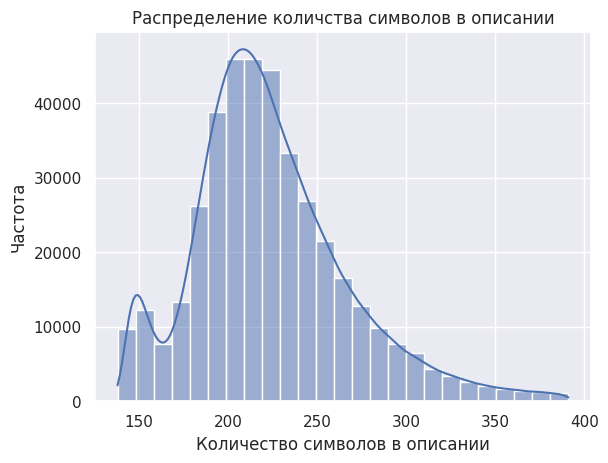

In [ ]:
sns.histplot(df_inf, x="len", kde=True, binwidth=10).set(
    title="Распределение количства символов в описании",
    xlabel="Количество символов в описании",
    ylabel="Частота",
)

[Text(0.5, 1.0, 'Распределение количства эпитетов в описании'),
 Text(0.5, 0, 'Количество эпитетов в описании'),
 Text(0, 0.5, 'Частота')]

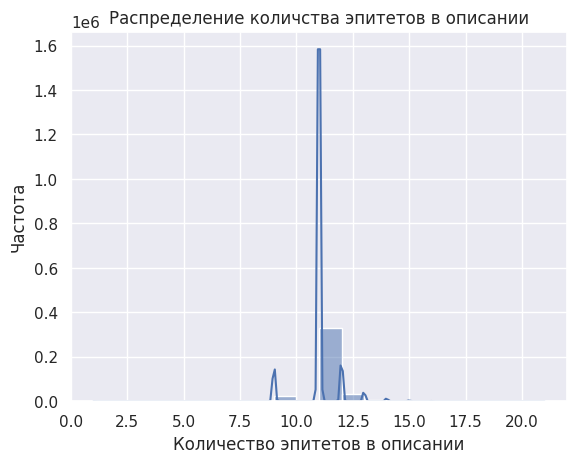

In [ ]:
sns.histplot(df_inf, x="epitets_num", kde=True).set(
    title="Распределение количства эпитетов в описании",
    xlabel="Количество эпитетов в описании",
    ylabel="Частота",
)

[Text(0.5, 1.0, 'Распределение количства символов в описании'),
 Text(0, 0.5, 'Количество символов в описании')]

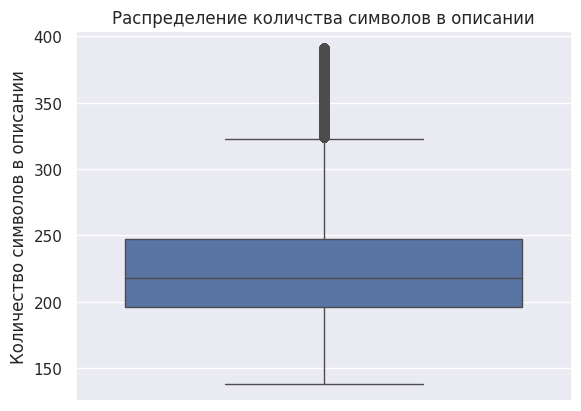

In [ ]:
sns.boxplot(df_inf, y="len").set(
    title="Распределение количства символов в описании",
    ylabel="Количество символов в описании",
)

[Text(0.5, 1.0, 'Распределение количства эпитетов в описании'),
 Text(0, 0.5, 'Количество эпитетов в описании')]

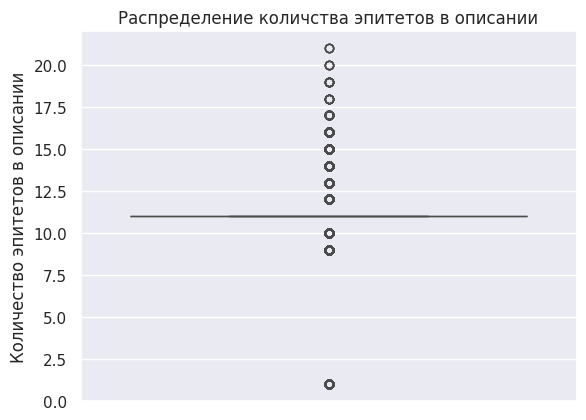

In [ ]:
sns.boxplot(df_inf, y="epitets_num").set(
    title="Распределение количства эпитетов в описании",
    ylabel="Количество эпитетов в описании",
)

In [ ]:
stop_words = stopwords.words("english")

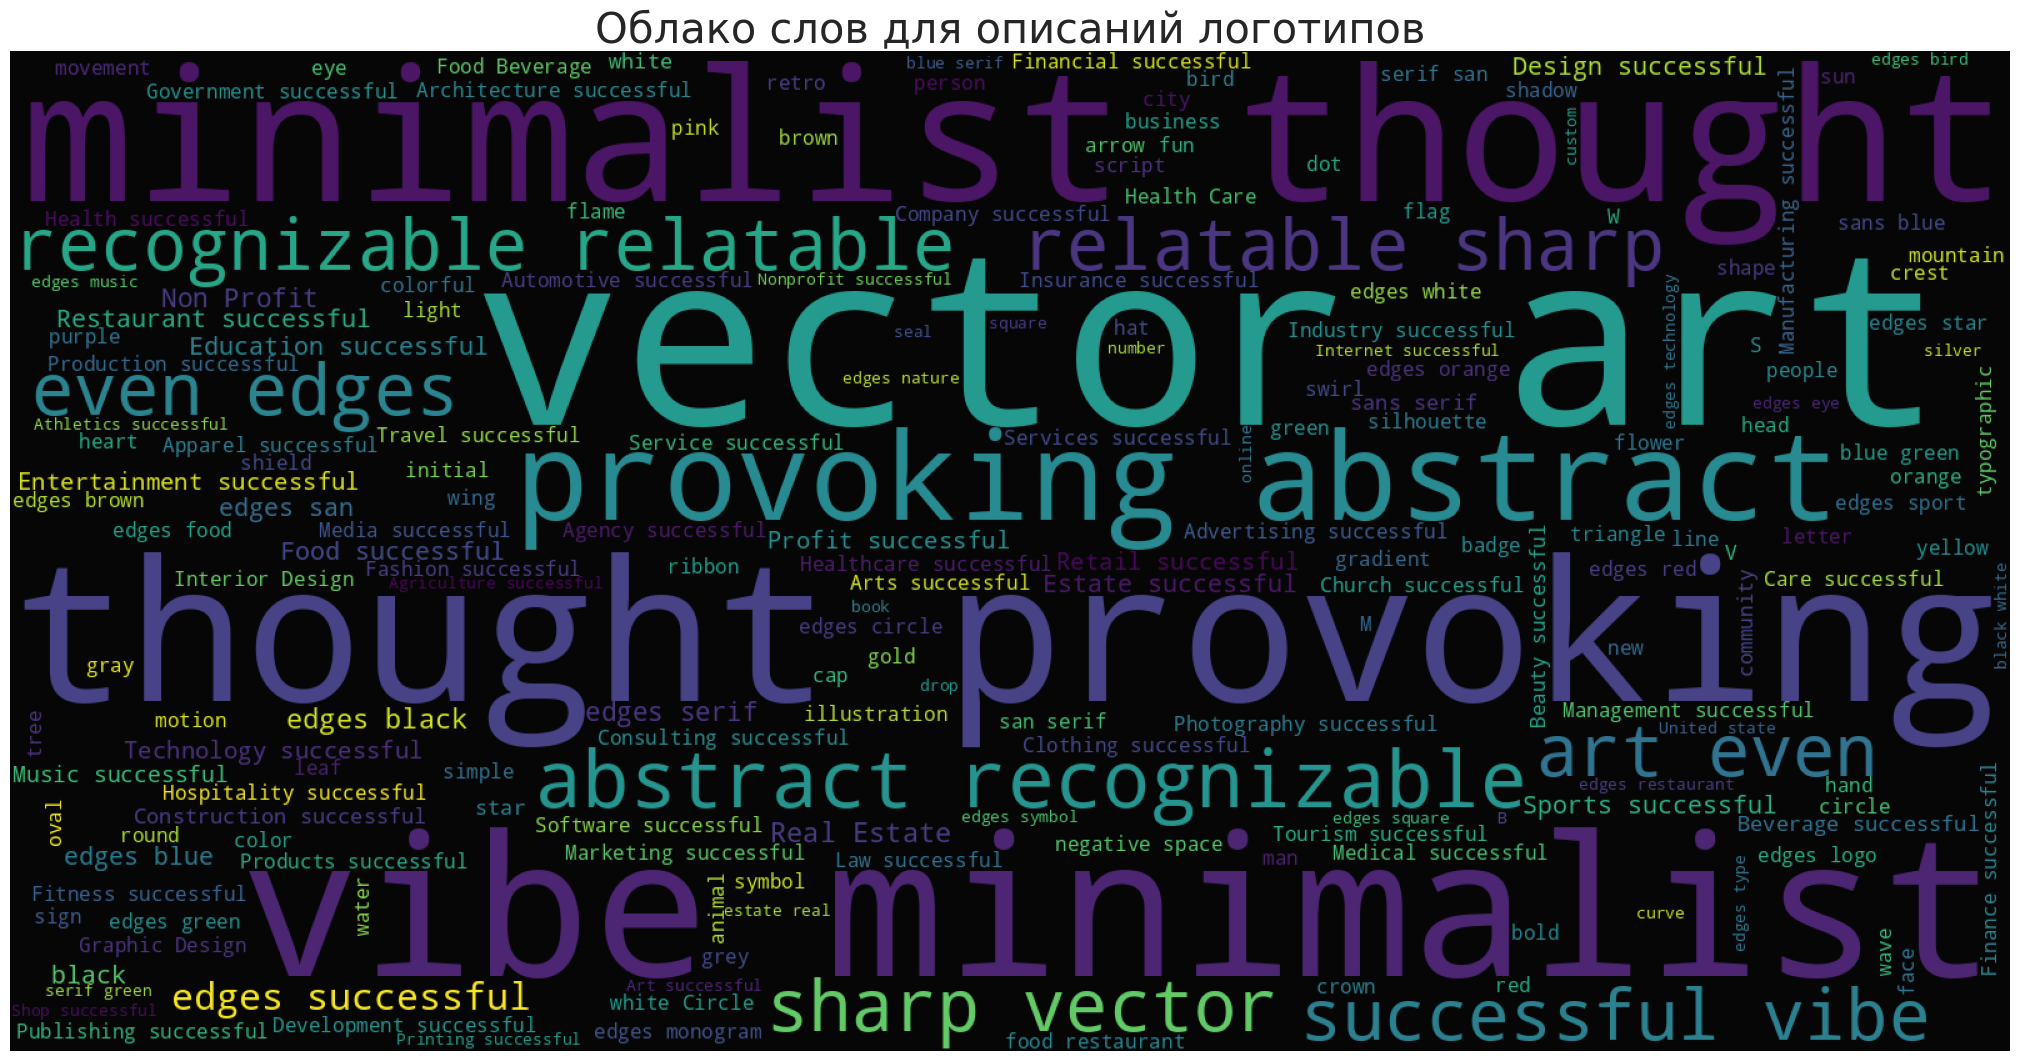

In [ ]:
wc = WordCloud(background_color="black", width=1600, height=800)
words = df_inf["description"].explode().values
wc.generate(" ".join(words))

fig, ax = plt.subplots(1, 1, figsize=(20, 10))
plt.axis("off")
plt.tight_layout(pad=0)
ax.set_title(f"Облако слов для описаний логотипов", fontsize=30)
ax.imshow(wc, alpha=0.98)

**Работа с информацией об изображениях**

In [ ]:
# im_shape = []
# for i in tqdm(range(len(df_inf))):
#   im_shape.append(np.array(dataset[i]['image'], dtype=np.uint8).shape)

In [ ]:
# df_inf['image shape'] = im_shape
# df_inf['image height'] = df_inf['image shape'].apply(lambda x: x[0])
# df_inf['image width'] = df_inf['image shape'].apply(lambda x: x[1])
# df_inf

In [ ]:
# df_inf[df_inf['image width'] != df_inf['image height']]

>В датасете есть неквадратные изображения

In [ ]:
# len(df_inf['image shape'].unique())

>Большое разнообрази форм изображений.

In [ ]:
# sns.histplot(df_inf, x = 'image height').set(title = 'Распределение высоты изображений',
#                             xlabel = 'Высота изображения в пикселях',
#                             ylabel = 'Частота')

In [ ]:
# sns.histplot(df_inf, x = 'image width').set(title = 'Распределение ширины изобрпажений',
#                             xlabel = 'Ширина изображения в пикселях',
#                             ylabel = 'Частота')

In [ ]:
# df_inf['pixels'] = df_inf.apply(lambda x: x['image height'] * x['image width'], axis = 1)
# df_inf

In [ ]:
# sns.histplot(df_inf, x = 'pixels').set(title = 'Распределение количества пикселей изображений',
#                             xlabel = 'Количество пикселей',
#                             ylabel = 'Частота')

In [ ]:
df = dataset

In [ ]:
def extract_means(img):
    return (
        round(np.mean(img[:, :, 0]), 2),
        round(np.mean(img[:, :, 1]), 2),
        round(np.mean(img[:, :, 2]), 2),
    )

In [ ]:
count = 27
sizes = []
means = []
red, green, blue = [], [], []
non_rgb = []
for part in tqdm(range(14000)):
    images = []
    for i in range(count):
        img = np.array(df[part * count + i]["image"])
        images.append(img)
        sizes.append(img.shape)
        try:
            means = extract_means(img)
            red.append(means[0])
            green.append(means[1])
            blue.append(means[2])
        except:
            non_rgb.append(part * count + i)

        del img

  0%|          | 0/14000 [00:00<?, ?it/s]

In [ ]:
len(non_rgb)

1228

(180, 180)


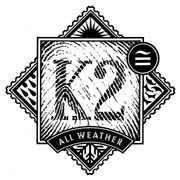

In [ ]:
print(np.array(dataset[non_rgb[1]]["image"]).shape)
dataset[non_rgb[1]]["image"]

(180, 180)


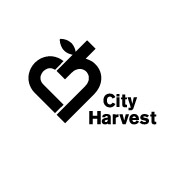

In [ ]:
print(np.array(dataset[non_rgb[999]]["image"]).shape)
dataset[non_rgb[999]]["image"]

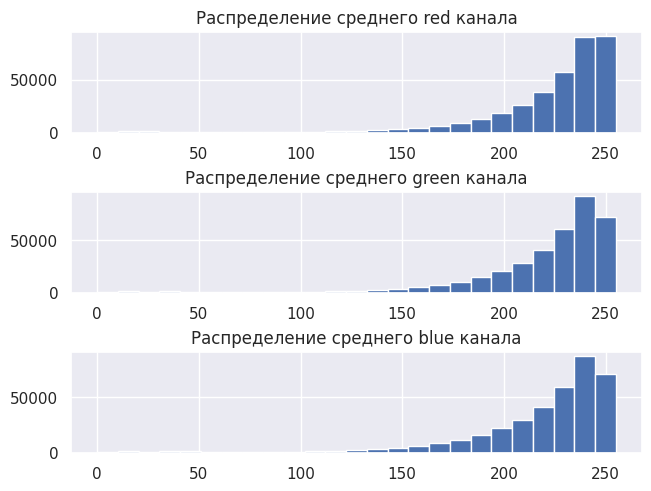

In [ ]:
fig, axs = plt.subplots(3, 1, layout="constrained")
axs[0].hist(red, bins=25)
axs[0].set_title("Распределение среднего red канала")
axs[1].hist(green, bins=25)
axs[1].set_title("Распределение среднего green канала")
axs[2].hist(blue, bins=25)
axs[2].set_title("Распределение среднего blue канала")
plt.show()

In [ ]:
height = np.array([el[0] for el in sizes])
width = np.array([el[1] for el in sizes])
ratio = height / width

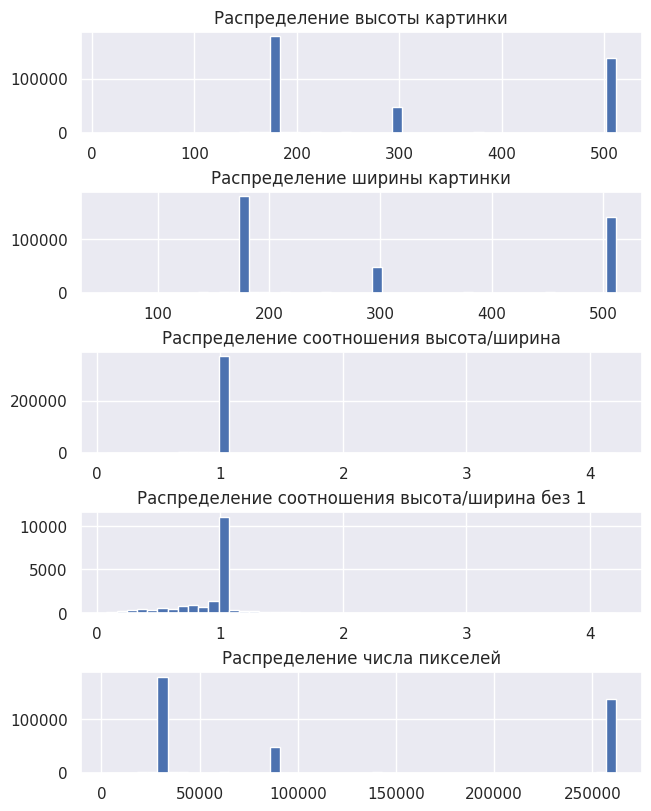

In [ ]:
fig, axs = plt.subplots(5, 1, layout="constrained")
fig.set_figheight(8)
axs[0].hist(height, bins=50)
axs[0].set_title("Распределение высоты картинки")
axs[1].hist(width, bins=50)
axs[1].set_title("Распределение ширины картинки")
axs[2].hist(ratio, bins=50)
axs[2].set_title("Распределение соотношения высота/ширина")
axs[3].hist(np.delete(ratio, np.where(ratio == 1)), bins=50)
axs[3].set_title("Распределение соотношения высота/ширина без 1")
axs[4].hist(height * width, bins=50)
axs[4].set_title("Распределение числа пикселей")
plt.show()